In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from math import sqrt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv("mugs-preference-parameters-full.csv")

In [181]:
#df.head()

In [4]:
df1 = pd.DataFrame()

j = 19
for i in range(1,19):
    col = 'I*' + str(df.columns[i])
    df1[col] = df.iloc[:,i]*df.iloc[:,j]
    if i%3 == 0:
        j += 1

In [5]:
#df1

In [6]:
df2 = pd.DataFrame(columns = ['price', 'timeinsulated','capacity','cleanability','containment'])

for price in ['30', '10', '5']:
    for timeinsulated in ['0.5', '1', '3']:
         for capacity in ['12', '20', '32']:
            for cleanability in ["Difficult", "Fair", "Easy"]: 
                for containment in ["Slosh resistant", "Spill resistant", "Leak resistant"]:
                    df2 = df2.append({'price': price, 'timeinsulated': timeinsulated, 'capacity':capacity, 'cleanability':cleanability, 'containment':containment},ignore_index=True) 

In [7]:
#df2

In [8]:
# use one hot encoding
encoder = OneHotEncoder().fit(df2)
df2_encoded = encoder.transform(df2).toarray()
column_name = encoder.get_feature_names()
df2_encoded =  pd.DataFrame(df2_encoded, columns= column_name)

In [9]:
#df2_encoded

In [10]:
df2_encoded = df2_encoded.reindex(['x0_30','x0_10','x0_5','x1_0.5', 'x1_1', 'x1_3', 'x2_12',
       'x2_20', 'x2_32', 'x3_Difficult', 'x3_Fair','x3_Easy', 
       'x4_Slosh resistant', 'x4_Spill resistant','x4_Leak resistant'],axis=1)

In [11]:
#df2_encoded

In [12]:
df2_encoded['a'] = 0
df2_encoded['b'] = 0
df2_encoded['c'] = 1

In [182]:
#df2_encoded

In [14]:
product = np.dot(df1,df2_encoded.T)
product = pd.DataFrame(product)

In [15]:
#product

In [16]:
c=0.0139
product = np.exp(product * c)

In [17]:
#product

In [18]:
df3 = pd.DataFrame()
df3 = df3.append({ 'x0_30':1, 'x1_3':1, 'x2_20':1, 'x3_Easy':1, 'x4_Leak resistant':1, 'a':1 }, ignore_index=True)
df3 = df3.append({ 'x0_10':1, 'x1_1':1, 'x2_20':1, 'x3_Fair':1, 'x4_Spill resistant':1, 'b':1}, ignore_index=True)

In [19]:
df3 = df3.fillna(0)

In [20]:
df3[['x0_5','x1_0.5','x3_Difficult','x4_Slosh resistant','x2_12','x2_32', 'c']] = 0
df3 = df3.reindex(['x0_30','x0_10','x0_5','x1_0.5', 'x1_1', 'x1_3', 'x2_12',
       'x2_20', 'x2_32', 'x3_Difficult', 'x3_Fair','x3_Easy', 
       'x4_Slosh resistant', 'x4_Spill resistant','x4_Leak resistant','a', 'b', 'c'],axis=1)

In [183]:
#df3

In [22]:
product1 = np.dot(df1,df3.T)
product1 = pd.DataFrame(product1)

In [23]:
c=0.0139
product1 = np.exp(product1 * c)

In [24]:
#product1

In [25]:
product1_sum= product1.sum(axis = 1)
#product1_sum

In [26]:
prob = pd.DataFrame()

In [27]:
prob = []
customer, prod = product.shape

for i in range(customer):
    prob_i = []
    for j in range(prod):
        prob_i.append(product.iloc[i,j]/(product.iloc[i,j]+product1_sum.iloc[i])) 
    prob.append(prob_i)
prob = pd.DataFrame(prob)

In [28]:
#prob

In [29]:
prob_avg = prob.mean()

In [30]:
#prob_avg

In [31]:
cost = pd.DataFrame()
cost = cost.append({'x0_30':30 ,'x0_10': 10,'x0_5' :5 ,'x1_0.5' : 0.5, 'x1_1': 1, 'x1_3' :3, 'x2_12' :1,
       'x2_20':2.6, 'x2_32':2.8, 'x3_Difficult':1, 'x3_Fair':2.2,'x3_Easy':3.0, 
       'x4_Slosh resistant':0.5, 'x4_Spill resistant':0.8,'x4_Leak resistant':1,'a':1, 'b':1, 'c':1},ignore_index = True)

In [32]:
cost = cost.reindex(['x0_30','x0_10','x0_5','x1_0.5', 'x1_1', 'x1_3', 'x2_12',
       'x2_20', 'x2_32', 'x3_Difficult', 'x3_Fair','x3_Easy', 
       'x4_Slosh resistant', 'x4_Spill resistant','x4_Leak resistant','a','b','c'],axis=1)

In [33]:
#cost

In [34]:
#df2_encoded

In [35]:
pandc = pd.DataFrame()

for i in range(243):
    temp = cost* df2_encoded.iloc[i]
    pandc = pandc.append(temp)

In [36]:
#pandc

In [37]:
pandc['price_'] = pandc.iloc[:,0:3].sum(axis = 1)
pandc['cost'] = pandc.iloc[:,3:15].sum(axis=1)
pandc['margin'] = pandc['price_'] - pandc['cost']

In [38]:
pandc.reset_index(inplace=True)

In [39]:
#pandc

In [40]:
#pandc['margin'].iloc[242]

In [41]:
pandc['exp'] = pandc['margin'] * prob_avg

In [42]:
#pandc

# Question 1

In [43]:
pandc['exp'][44]

4.357384811895731

# Question 2

In [44]:
result = pd.DataFrame()

In [45]:
result['marketshare']  = prob_avg

In [46]:
result[['price_', 'margin', 'exp']] = pandc[['price_', 'margin', 'exp']]

In [47]:
result

,marketshare,price_,margin,exp
0,0.016530,30.0,27.0,0.446321
1,0.025234,30.0,26.7,0.673761
2,0.042167,30.0,26.5,1.117416
3,0.033560,30.0,25.8,0.865858
4,0.051275,30.0,25.5,1.307513
...,...,...,...,...
238,0.455497,5.0,-3.8,-1.730890
239,0.555399,5.0,-4.0,-2.221595
240,0.441466,5.0,-4.3,-1.898304
241,0.529777,5.0,-4.6,-2.436975


In [48]:
result.to_csv(r'~\Desktop\export_dataframe.csv')

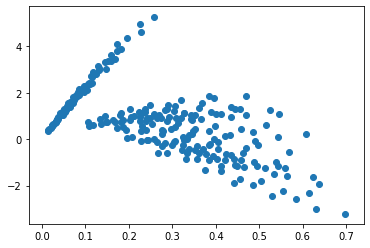

In [185]:
plt.scatter(result['marketshare'], result['exp'])

# Question 3

In [50]:
#pandc['exp'].argmax()

In [51]:
#pandc.iloc[71]['price_']

In [52]:
#pandc.iloc[71][['price_','margin','exp']]

In [53]:
cu = []
cu1 = []
cu.append(df2.iloc[71])
cu1.append(pandc.iloc[71][['price_','margin','exp']])

In [54]:
prob_avg_a = pd.DataFrame(prob_avg)

In [55]:
cu = pd.DataFrame()
cu = cu.append(df2.iloc[71],ignore_index=True)
cu = cu.append({'marketshare':prob_avg.iloc[71]},ignore_index=True)
cu = cu.append(pandc.iloc[71][['price_','margin','exp']],ignore_index=True)

In [56]:
cu = cu.reindex(['price','timeinsulated','capacity','cleanability', 'containment', 'marketshare', 'price_', 'margin',
       'exp'],axis=1)

In [57]:
cu = cu.fillna(method='ffill')
cu = cu.fillna(method='ffill')

In [58]:
cu.iloc[2]

price                        30
timeinsulated                 3
capacity                     20
cleanability               Easy
containment      Leak resistant
marketshare             0.25884
price_                       30
margin                     20.4
exp                     5.28034
Name: 2, dtype: object

In [59]:
# importance
ip = df.iloc[:, 19:25]

In [60]:
#rating
rt = df.iloc[:,1:19]

# Optional 1

In [149]:
def EBA(rt, ip, cutoff):
    #sort the importance
    epsilon = np.random.uniform(-0.49, +0.49, 6)
    sort_ip = np.argsort(-ip+epsilon)
    #broadcast 
    bc = np.broadcast_to(sort_ip, (3, 6))
    #interact
    reordered = np.array(list(map(lambda x,y:y[x],bc,rt)))
    #within row accumulation
    att = np.argmax(reordered<cutoff,axis=1)
    att = att + np.all(reordered>cutoff,axis=1) *1000
    #within column 
    #randomly select one when there is a tie
    rand_select = np.random.choice(np.where(att == att.max())[0])
    return rand_select

# Question 4

In [150]:
share = []

In [151]:
for i in range(243):
    print('just letting you know Im at', i)
    dummy = np.append(df2_encoded.iloc[i],df3).reshape((3,18))
#     print('dummy',dummy)
    countc = 0
    for j in range(311):
#         print('this is j',j)
        rt0 = rt.iloc[j].to_numpy()
#         print('rt0',rt0)
        dummy1 = dummy * rt0
#         print('ere',dummy)
        dummy1 = dummy1[dummy1!=0].reshape((3,6))
#         print('again', dummy1)
        c = 0
        while c<100:
            if EBA(dummy1, ip.iloc[j],2.5) == 0:
                countc += 1
            c += 1
    frac = countc/31100
    share.append(frac) 

just letting you know Im at 0
just letting you know Im at 1
just letting you know Im at 2
just letting you know Im at 3
just letting you know Im at 4
just letting you know Im at 5
just letting you know Im at 6
just letting you know Im at 7
just letting you know Im at 8
just letting you know Im at 9
just letting you know Im at 10
just letting you know Im at 11
just letting you know Im at 12
just letting you know Im at 13
just letting you know Im at 14
just letting you know Im at 15
just letting you know Im at 16
just letting you know Im at 17
just letting you know Im at 18
just letting you know Im at 19
just letting you know Im at 20
just letting you know Im at 21
just letting you know Im at 22
just letting you know Im at 23
just letting you know Im at 24
just letting you know Im at 25
just letting you know Im at 26
just letting you know Im at 27
just letting you know Im at 28
just letting you know Im at 29
just letting you know Im at 30
just letting you know Im at 31
just letting you k

In [157]:
result1 = pd.DataFrame()
result1['marketshare'] = share
result1[['price_', 'margin']] = pandc[['price_', 'margin']]
result1['exp'] = pandc['margin'] * share

In [160]:
result1['exp'][44]

1.2136334405144693

In [158]:
result1.to_csv(r'~\Desktop\luanqibazao.csv')

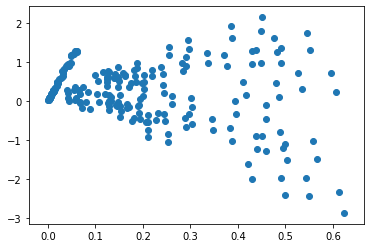

In [184]:
plt.scatter(result1['marketshare'], result1['exp'])

In [180]:
result1

,marketshare,price_,margin,exp
0,0.001029,30.0,27.0,0.027781
1,0.000932,30.0,26.7,0.024897
2,0.006559,30.0,26.5,0.173826
3,0.002990,30.0,25.8,0.077151
4,0.018939,30.0,25.5,0.482942
...,...,...,...,...
238,0.422026,5.0,-3.8,-1.603698
239,0.490772,5.0,-4.0,-1.963087
240,0.210772,5.0,-4.3,-0.906318
241,0.430064,5.0,-4.6,-1.978296


In [162]:
argmax2 = result1['exp'].argmax()

In [173]:
cu = pd.DataFrame()
cu = cu.append(df2.iloc[113],ignore_index=True)
cu = cu.append(result1.iloc[113][['marketshare','price_','margin','exp']],ignore_index=True)

In [175]:
cu = cu.reindex(['price','timeinsulated','capacity','cleanability', 'containment', 'marketshare', 'price_', 'margin',
       'exp'],axis=1)
cu = cu.fillna(method='ffill')

In [177]:
cu.iloc[1]

price                        10
timeinsulated                 1
capacity                     12
cleanability               Fair
containment      Leak resistant
marketshare            0.450836
price_                       10
margin                      4.8
exp                     2.16401
Name: 1, dtype: object